In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import cryptoz
from cryptoz import stats
import pandas as pd
import numpy as np

# data

In [2]:
from_dt = cryptoz.data.ago_dt(days=3)
to_dt = cryptoz.data.now_dt()
period = cryptoz.data.Period.M5

In [3]:
ohlc = cryptoz.data.chartdata('(USDT_+)', from_dt, to_dt, period)

   count         mean          std       min        25%        50%      75%  \
0  876.0  1170.851583  2920.698522  0.069371  18.374501  135.88695  542.825   

       max  
0  11733.0  


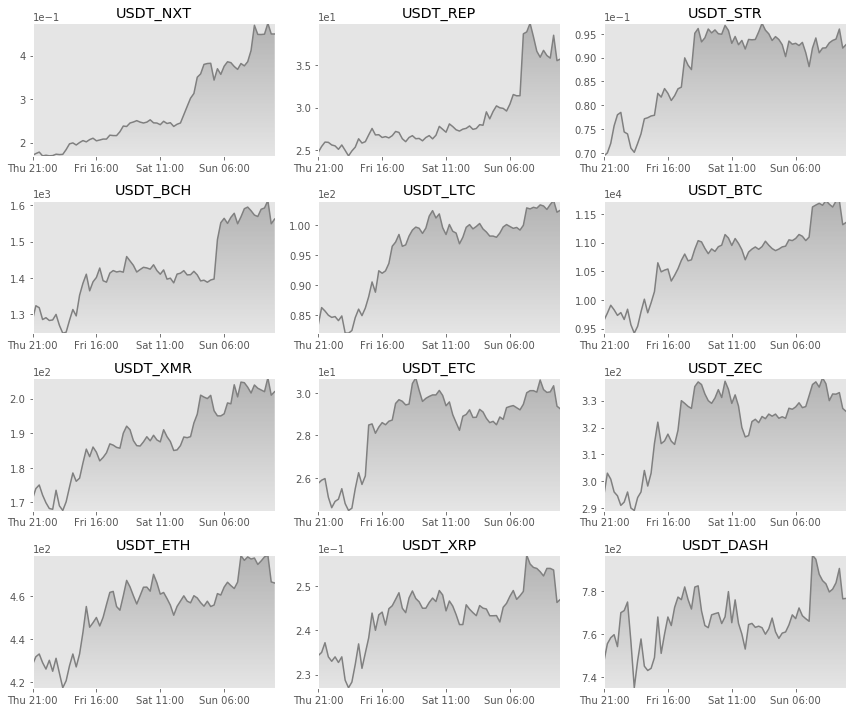

In [4]:
df = cryptoz.utils.to_df(ohlc, 'C')

cryptoz.plot.time_series(df.resample('1h').last(), ranker=lambda sr: 1 - sr.iloc[-1] / sr.min())

# recovery

In [5]:
df = stats.recovery.dd(ohlc)

cryptoz.utils.describe_df(df)

,count,mean,std,min,25%,50%,75%,max
USDT_BCH,864.0,-0.035110,0.016810,-0.081536,-0.046388,-0.034922,-0.021862,-7.873924e-12
USDT_BTC,864.0,-0.023015,0.013836,-0.075143,-0.030996,-0.021042,-0.012216,-9.259936e-04
USDT_DASH,864.0,-0.032068,0.012106,-0.069342,-0.041060,-0.033340,-0.023130,-4.044474e-08
USDT_ETC,864.0,-0.046329,0.021847,-0.100597,-0.061185,-0.047507,-0.026675,-3.267973e-03
USDT_ETH,864.0,-0.024615,0.012624,-0.062777,-0.034014,-0.023523,-0.014138,-2.734129e-04
USDT_LTC,864.0,-0.031039,0.020112,-0.092567,-0.043661,-0.031084,-0.013590,-9.919916e-04
USDT_NXT,864.0,-0.050898,0.037196,-0.222702,-0.071255,-0.041718,-0.022357,-1.085598e-03
USDT_REP,864.0,-0.064208,0.070749,-0.276605,-0.055232,-0.039075,-0.025433,0.000000e+00
USDT_STR,864.0,-0.045830,0.025142,-0.122906,-0.062911,-0.043388,-0.024083,-1.724507e-03
USDT_XMR,864.0,-0.031093,0.017524,-0.079049,-0.042342,-0.027681,-0.017475,-5.832450e-06


In [6]:
stats.recovery.dd_now(ohlc)

USDT_REP    -0.253816
USDT_NXT    -0.081633
USDT_STR    -0.055433
USDT_ETC    -0.053286
USDT_XRP    -0.049210
USDT_ZEC    -0.043988
USDT_BTC    -0.041938
USDT_DASH   -0.039905
USDT_BCH    -0.038769
USDT_LTC    -0.036466
USDT_ETH    -0.035204
USDT_XMR    -0.024504
dtype: float64

   count      mean      std       min       25%       50%      75%       max
0  876.0 -0.036435  0.03015 -0.260651 -0.045871 -0.030579 -0.01874 -0.002949


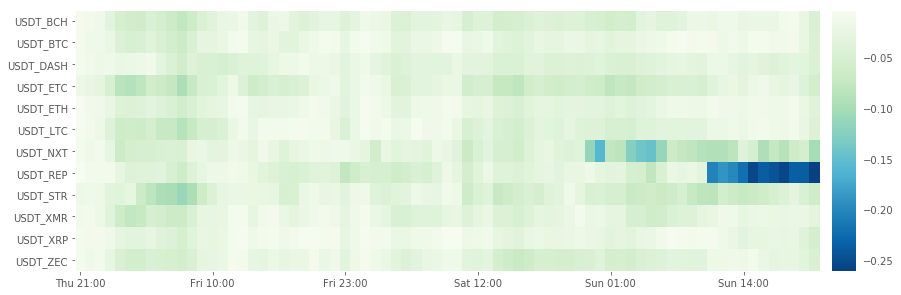

In [8]:
df = stats.recovery.resample_dd(ohlc, lambda df: df.mean(), '1h')

cryptoz.plot.evolution(df)

In [9]:
stats.recovery.maxdd_duration(ohlc)

USDT_NXT    01:00:00
USDT_DASH   02:35:00
USDT_XMR    02:55:00
USDT_ETH    07:40:00
USDT_BCH    07:50:00
USDT_BTC    07:50:00
USDT_LTC    08:00:00
USDT_ETC    08:50:00
USDT_XRP    08:55:00
USDT_REP    09:35:00
USDT_STR    14:00:00
USDT_ZEC    14:20:00
dtype: timedelta64[ns]

In [10]:
df = cryptoz.utils.to_df(stats.recovery.details(ohlc), 'dd_len')

cryptoz.utils.describe_df(df)

,count,mean,std,min,25%,50%,75%,max
USDT_BCH,17.0,20.058824,40.619377,1.0,1.00,4.0,15.00,153.0
USDT_BTC,24.0,12.916667,23.051769,1.0,1.00,2.0,8.75,94.0
USDT_DASH,12.0,34.250000,67.616734,1.0,1.75,5.0,28.00,228.0
USDT_ETC,9.0,35.555556,52.335722,1.0,1.00,5.0,53.00,138.0
USDT_ETH,18.0,18.944444,32.295460,1.0,1.00,2.0,25.25,103.0
USDT_LTC,26.0,10.423077,21.568817,1.0,1.00,2.0,8.75,96.0
USDT_NXT,40.0,5.800000,7.802695,1.0,1.00,2.0,7.25,31.0
USDT_REP,23.0,17.478261,33.708469,1.0,1.00,2.0,12.00,115.0
USDT_STR,23.0,15.608696,35.272625,1.0,2.00,3.0,15.00,168.0
USDT_XMR,22.0,15.136364,34.070369,1.0,1.00,2.0,12.50,154.0


# corr

   count      mean      std       min       25%       50%       75%  max
0  144.0  0.820615  0.14241  0.455742  0.726225  0.858687  0.937646  1.0


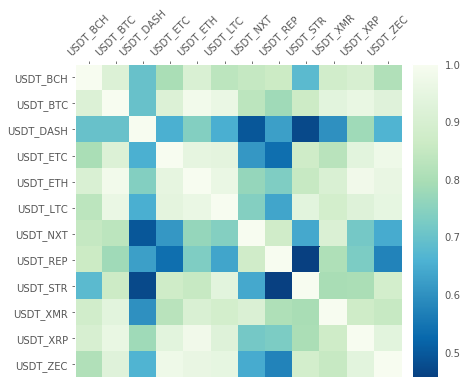

In [11]:
df = stats.corr.corr(cryptoz.utils.to_df(ohlc, 'C'))

cryptoz.plot.matrix(df)

   count      mean       std      min       25%       50%       75%       max
0  730.0  0.475055  0.401194 -0.79528  0.278023  0.571595  0.793974  0.993005


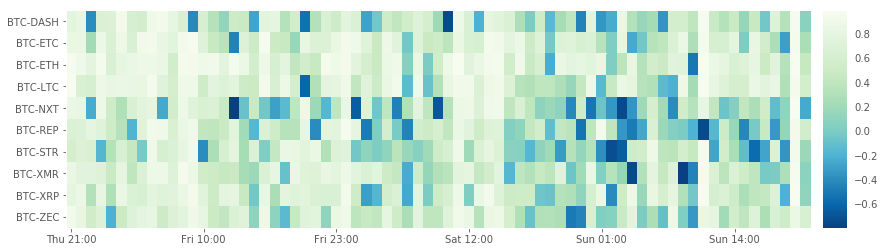

In [20]:
import re

df = cryptoz.utils.to_df(ohlc, 'C')
df = stats.corr.resample_corr(df, '1h')
regex = re.compile('(USDT_BTC-+)')
df = df[list(filter(regex.search, df.columns))]
df.columns = list(map(lambda x: re.sub(r'(USDT_)', '', x), df.columns))

norm = cryptoz.plot.MidpointNormalize(midpoint=0.0)
cryptoz.plot.evolution(df, norm=norm)

# depth

    count         mean            std            min           25%       50%  \
0  2400.0  7534.802403  171675.808462 -495716.265597 -72943.700857  2.967586   

             75%            max  
0  123034.560751  712029.394046  


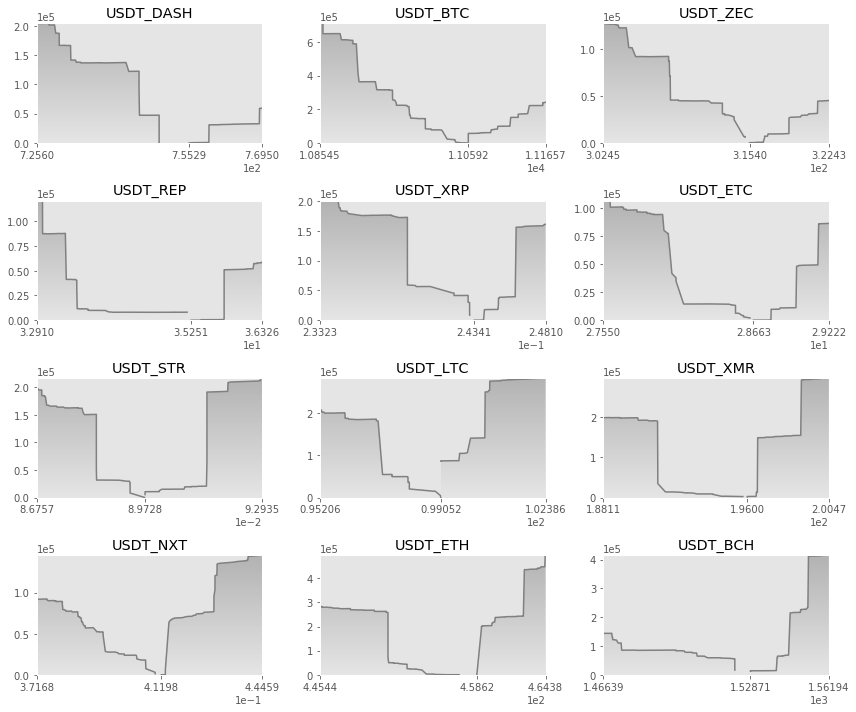

In [52]:
orderbooks = cryptoz.data.orderbooks('(USDT_+)')

cryptoz.plot.depth(orderbooks, colors=('grey', 'grey'), ranker=lambda sr: 1 - sr.max() / abs(sr.min()))

# score

In [53]:
def BB(sr, window, std_n):
    rollmean_sr = sr.rolling(window=window, min_periods=1).mean()
    rollstd_sr = sr.rolling(window=window, min_periods=1).std()
    upper_band_sr = rollmean_sr + std_n * rollstd_sr
    lower_band_sr = rollmean_sr - std_n * rollstd_sr
    return upper_band_sr, lower_band_sr

def crossover(sr1, sr2):
    return sr1 - sr2

def normalize(sr):
    return (sr - sr.mean()) / sr.std()

   count      mean       std   min        25%       50%       75%   max
0  756.0 -0.988721  9.298562 -12.0 -10.525001 -2.984419  9.320464  12.0


/Users/olegpolakow/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


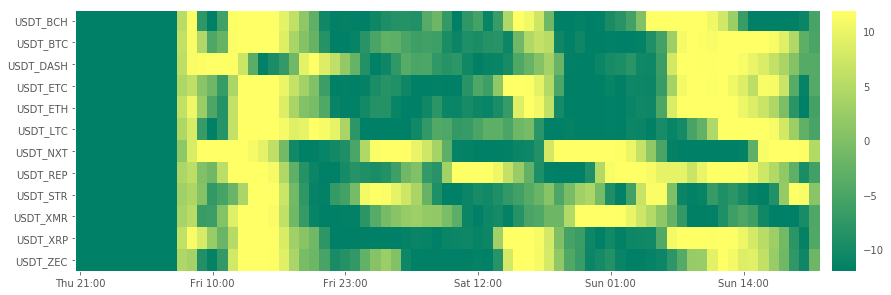

In [58]:
window = 6 * 20
strategy = lambda ohlc_df: normalize(crossover(*BB(ohlc_df['C'], window, 3)))
df1 = pd.DataFrame({pair: strategy(ohlc_df) for pair, ohlc_df in ohlc.items()})
score1 = cryptoz.score.rolling_apply(df1, window=window, min_periods=window)

cryptoz.plot.evolution(score1.resample('1h').sum(), cmap=plt.cm.summer)

In [ ]:
strategy = lambda ohlc_df: normalize(crossover(ohlc_df['C'], ohlc_df['C'].rolling(window=, min_periods=1).mean()))
df2 = pd.DataFrame({pair: strategy(ohlc_df) for pair, ohlc_df in ohlc.items()})
score2 = cryptoz.score.rolling_apply(df2)

cryptoz.plot.evolution(score2.resample('1h').sum(), cmap=plt.cm.summer)

Rules
1. narrow corridor and price over MA -> trend up -> buy
2. wide corridor and price below MA -> oversold -> buy
3. narrow corridor and price below MA -> trend down -> sell
4. wide corridor and price above MA -> overbought -> sell

In [ ]:
score_df = cryptoz.score.diff(score1, score2)

cryptoz.plot.evolution(score_df.resample('1h').sum(), cmap=plt.cm.summer)